In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mn
%matplotlib inline

In [2]:
df2 = pd.read_csv('C:/Users/shrey/Desktop/ABA Project/Group Project Option 2 QVC/email_campaign.csv')
df2.head(10)

,CAMPAIGN_DATE,PRODUCT_CATEGORY,CAMPAIGN_SPEND
0,1/1/2015,All,7191.95
1,1/1/2015,Accessories,1493.85
2,1/1/2015,Jewelry,380.53
3,1/2/2015,"Apparel, Accessories & Jewelry",531.87
4,1/5/2015,Apparel & Accessories,3788.44
5,1/8/2015,All,8632.31
6,1/15/2015,All,62.09
7,1/16/2015,Electronics,5306.11
8,1/17/2015,Kitchen & Food,2028.67
9,1/19/2015,Apparel,1270.00


In [3]:
df2 = df2.drop('PRODUCT_CATEGORY', axis=1)
df2.head(10)

,CAMPAIGN_DATE,CAMPAIGN_SPEND
0,1/1/2015,7191.95
1,1/1/2015,1493.85
2,1/1/2015,380.53
3,1/2/2015,531.87
4,1/5/2015,3788.44
5,1/8/2015,8632.31
6,1/15/2015,62.09
7,1/16/2015,5306.11
8,1/17/2015,2028.67
9,1/19/2015,1270.00


In [4]:
df2['CAMPAIGN_DATE'] = pd.to_datetime(df2['CAMPAIGN_DATE'])
df2.head(10)

,CAMPAIGN_DATE,CAMPAIGN_SPEND
0,2015-01-01,7191.95
1,2015-01-01,1493.85
2,2015-01-01,380.53
3,2015-01-02,531.87
4,2015-01-05,3788.44
5,2015-01-08,8632.31
6,2015-01-15,62.09
7,2015-01-16,5306.11
8,2015-01-17,2028.67
9,2015-01-19,1270.00


In [5]:
df2 = df2['CAMPAIGN_SPEND'].groupby(df2['CAMPAIGN_DATE']).agg(['sum']).reset_index()
df2.head(10)

,CAMPAIGN_DATE,sum
0,2015-01-01,9066.33
1,2015-01-02,531.87
2,2015-01-05,3788.44
3,2015-01-08,8632.31
4,2015-01-15,62.09
5,2015-01-16,5306.11
6,2015-01-17,2028.67
7,2015-01-19,1270.00
8,2015-01-21,5061.12
9,2015-01-23,1029.70


In [6]:
df2 = df2.rename(columns={'CAMPAIGN_DATE': 'DATE'})


In [7]:
df2 = df2.fillna(0)
df2.head(10)

,DATE,sum
0,2015-01-01,9066.33
1,2015-01-02,531.87
2,2015-01-05,3788.44
3,2015-01-08,8632.31
4,2015-01-15,62.09
5,2015-01-16,5306.11
6,2015-01-17,2028.67
7,2015-01-19,1270.00
8,2015-01-21,5061.12
9,2015-01-23,1029.70


In [9]:
df2 = df2.set_index(['DATE'])
df2.drop(df2.index[[0]], inplace=True)


In [10]:
type(df2['sum'])


pandas.core.series.Series

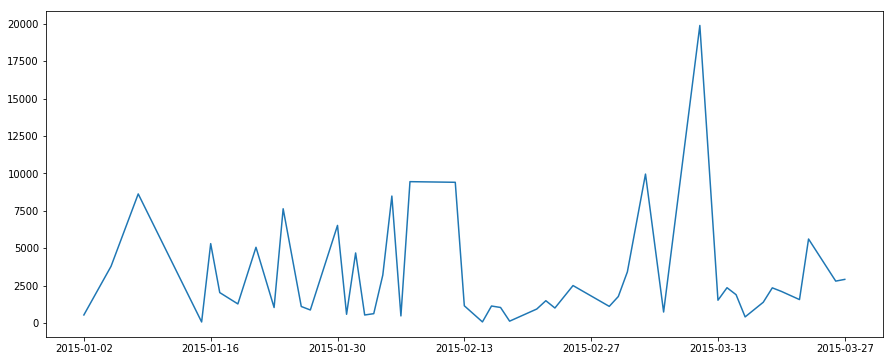

In [91]:
import matplotlib.pylab as pl
pl.plot(df2['sum'])


In [12]:
# Check whether series is white noise
from statsmodels.stats.diagnostic import acorr_ljungbox
acorr_ljungbox(df2['sum'])


C:\Users\shrey\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(array([  1.1123758 ,   2.83517101,   2.97579797,   4.92354115,
          5.8310312 ,   6.64669027,   7.56617012,   8.2263323 ,
          8.23155418,   9.281947  ,   9.37080772,   9.38369113,
          9.42998222,   9.43088017,  10.23683408,  18.67726264,
         19.64048775,  20.91796563,  20.93147145,  21.93576094,
         23.69225537,  23.82534471,  25.6276914 ,  26.50539708,
         26.52588572,  27.5782859 ,  30.67959529,  31.49510241,
         31.72068665,  31.96119766,  32.39196684,  34.41680759,
         35.45311196,  37.59311956,  37.59591909,  38.14867394,
         38.16036668,  38.16147168,  38.23365188,  38.23433203]),
 array([ 0.29156609,  0.24229834,  0.39537173,  0.295233  ,  0.32300911,
         0.35475966,  0.37239641,  0.41167957,  0.51099024,  0.50557123,
         0.58770607,  0.6698556 ,  0.73974928,  0.80249819,  0.8045838 ,
         0.28575394,  0.29302939,  0.28357197,  0.34059979,  0.34400658,
         0.30820728,  0.35645074,  0.31875426,  0.32802952,  0.379

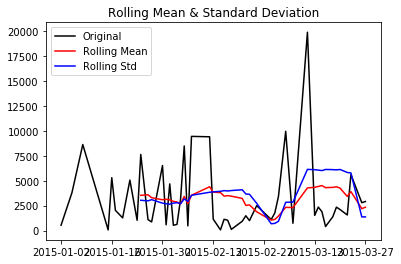

In [13]:
#Determing rolling statistics
rolmean = df2['sum'].rolling(window=10).mean()
rolstd = df2['sum'].rolling(window=10).std()


#Plot rolling statistics:
orig = plt.plot(df2['sum'], color='black',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='blue', label = 'Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


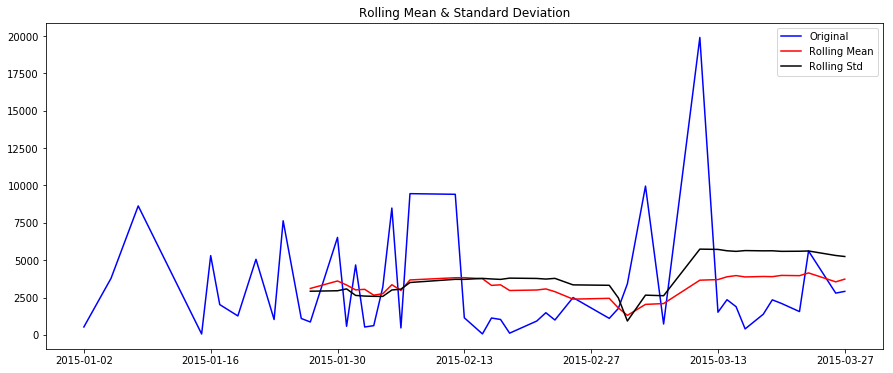

Results of Dickey-Fuller Test:
Test Statistic                -7.82737
p-value                        0.00000
#Lags Used                     0.00000
Number of Observations Used   47.00000
Critical Value (1%)           -3.57785
Critical Value (5%)           -2.92534
Critical Value (10%)          -2.60077
dtype: float64


In [92]:
test_stationarity(df2['sum'])


# Taking Log Transform to identify trend

In [ ]:
ts_log = np.log(df2['sum'])

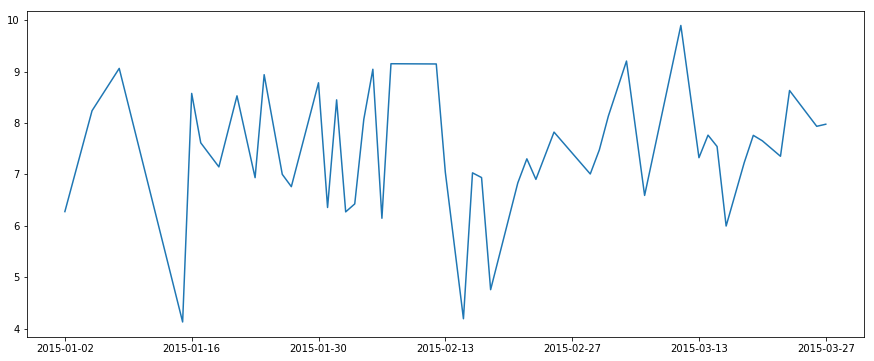

In [95]:
plt.plot(ts_log)

# Moving average
In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


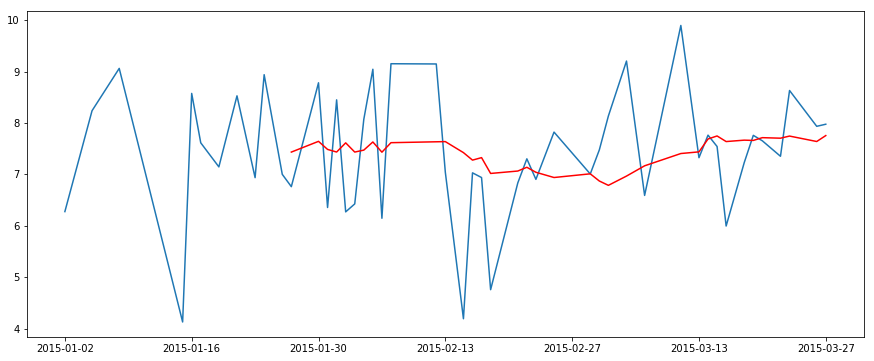

In [97]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [17]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

DATE
2015-01-02        nan
2015-01-05        nan
2015-01-08        nan
2015-01-15        nan
2015-01-16        nan
2015-01-17        nan
2015-01-19        nan
2015-01-21        nan
2015-01-23        nan
2015-01-24        nan
2015-01-26        nan
2015-01-27   -0.67281
Name: sum, dtype: float64

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


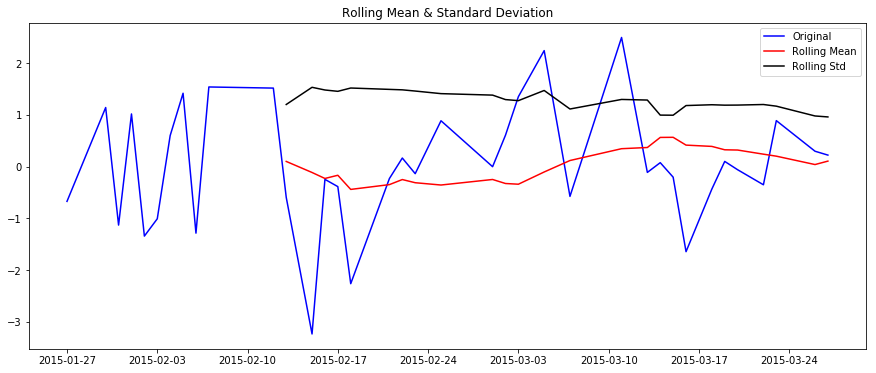

Results of Dickey-Fuller Test:
Test Statistic                -5.79578
p-value                        0.00000
#Lags Used                     0.00000
Number of Observations Used   36.00000
Critical Value (1%)           -3.62665
Critical Value (5%)           -2.94595
Critical Value (10%)          -2.61167
dtype: float64


In [98]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

# Exponentially weighted moving average
Lets take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving averagem where weights are assigned to all the previous values with a decay factor

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


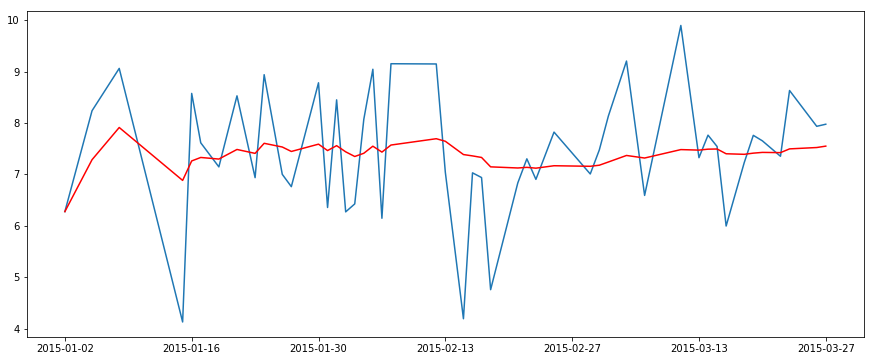

In [103]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


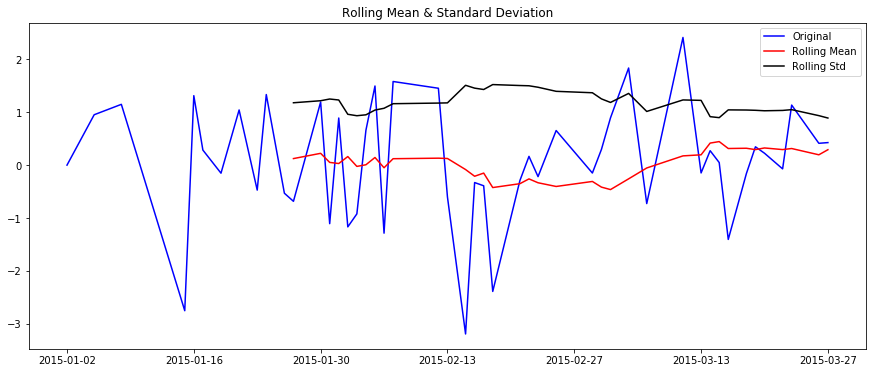

Results of Dickey-Fuller Test:
Test Statistic                -7.75620
p-value                        0.00000
#Lags Used                     0.00000
Number of Observations Used   47.00000
Critical Value (1%)           -3.57785
Critical Value (5%)           -2.92534
Critical Value (10%)          -2.60077
dtype: float64


In [104]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

# Differencing

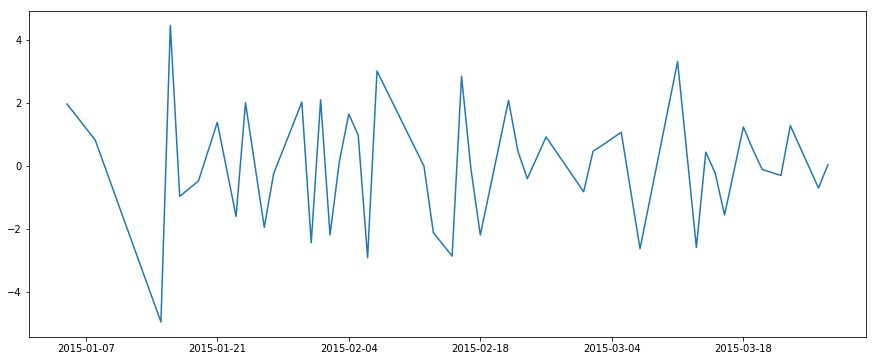

In [105]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


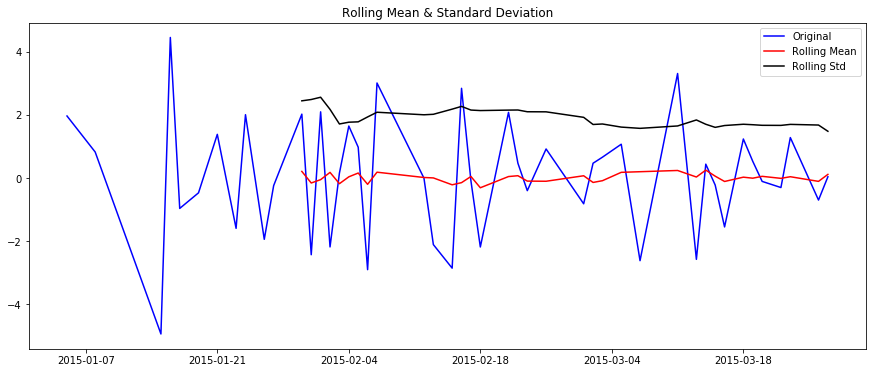

Results of Dickey-Fuller Test:
Test Statistic                -10.89407
p-value                         0.00000
#Lags Used                      1.00000
Number of Observations Used    45.00000
Critical Value (1%)            -3.58483
Critical Value (5%)            -2.92830
Critical Value (10%)           -2.60234
dtype: float64


In [106]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

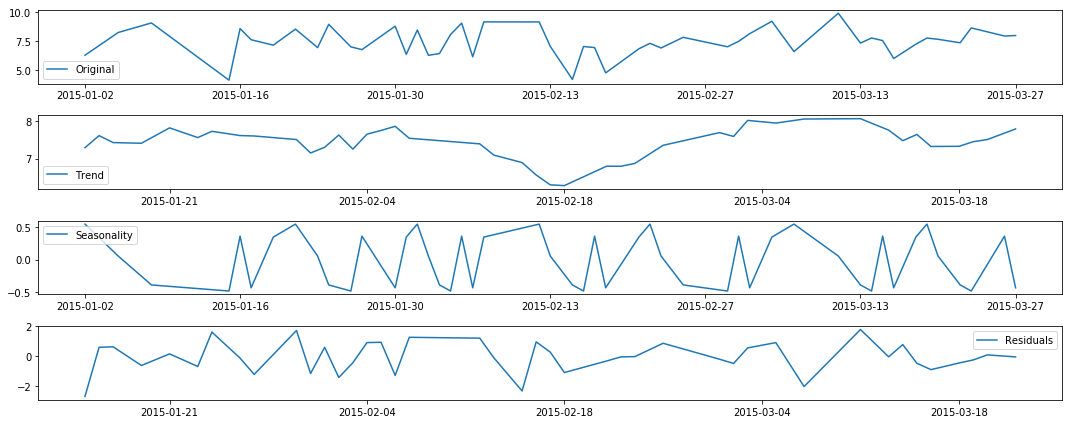

In [107]:
from statsmodels.tsa.seasonal import seasonal_decompose
fq=7
decomposition = seasonal_decompose(ts_log,freq=fq)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Checking Stationarity of Residuals

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


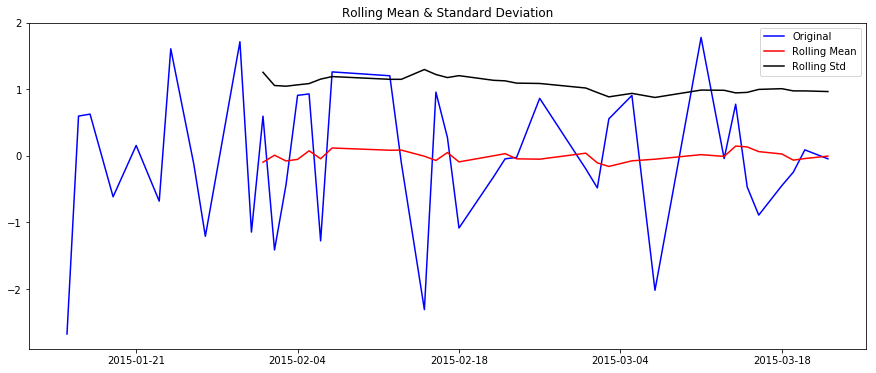

Results of Dickey-Fuller Test:
Test Statistic                -3.20140
p-value                        0.01990
#Lags Used                    10.00000
Number of Observations Used   31.00000
Critical Value (1%)           -3.66143
Critical Value (5%)           -2.96053
Critical Value (10%)          -2.61932
dtype: float64


In [108]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [ ]:
#Forecasting a time series

In [30]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [31]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

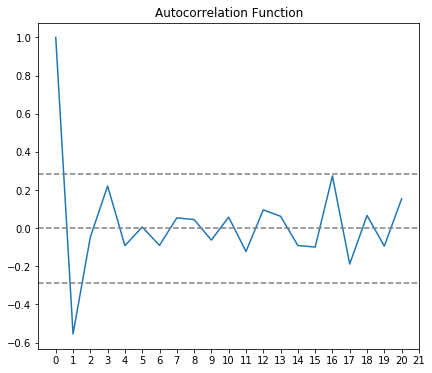

In [72]:
#Plot ACF: 
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.subplot(121) 
plt.plot(lag_acf)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

Text(0.5,1,'Partial Autocorrelation Function')

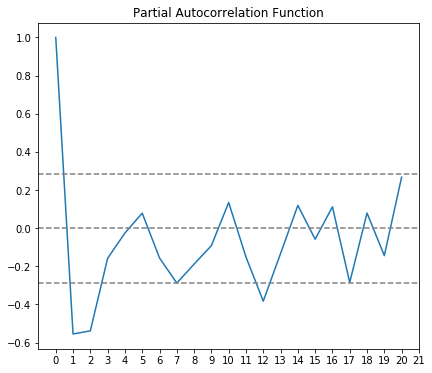

In [70]:
#Plot PACF:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.subplot(122)
plt.plot(lag_pacf)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
#plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=2.

In [88]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import arma_order_select_ic


Text(0.5,1,'RSS: 80.3747')

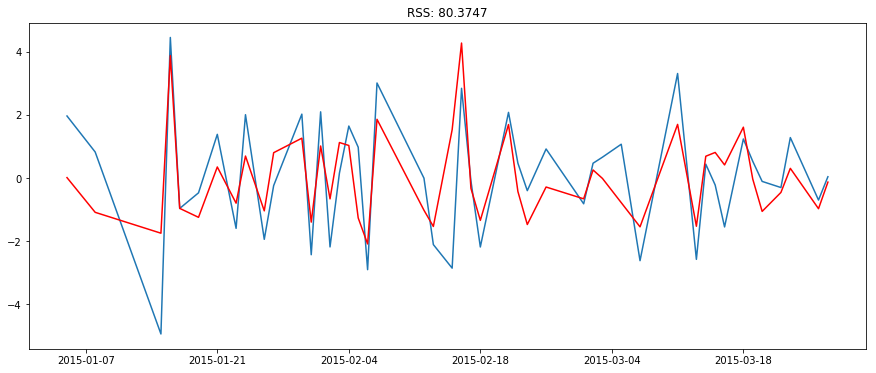

In [109]:
#for p=1 we get very high rss
model = ARIMA(ts_log, order=(3, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 81.7011')

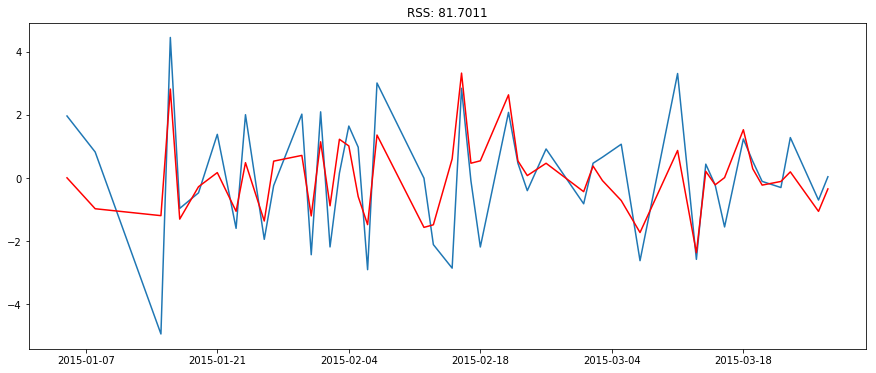

In [110]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5,1,'RSS: 80.3398')

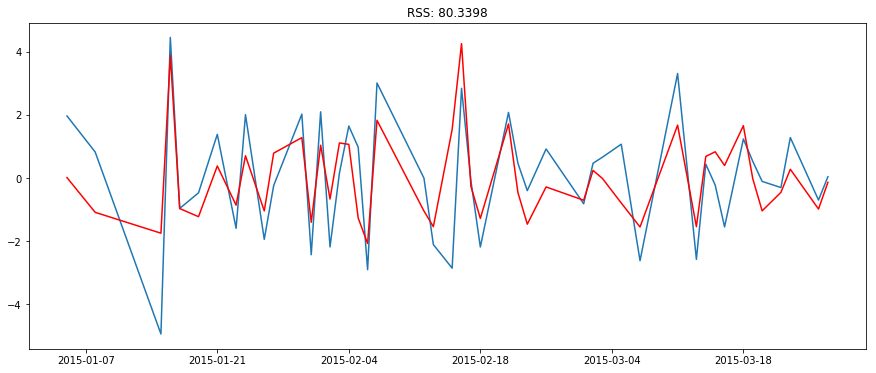

In [111]:
model = ARIMA(ts_log, order=(3, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [112]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

DATE
2015-01-05    0.01327
2015-01-08   -1.08605
2015-01-15   -1.74525
2015-01-16    3.87702
2015-01-17   -0.96587
dtype: float64


In [113]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

DATE
2015-01-05    0.01327
2015-01-08   -1.07278
2015-01-15   -2.81803
2015-01-16    1.05899
2015-01-17    0.09312
dtype: float64


In [114]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


DATE
2015-01-02   6.27640
2015-01-05   6.28967
2015-01-08   5.20362
2015-01-15   3.45837
2015-01-16   7.33539
dtype: float64

Text(0.5,1,'RMSE: 5209.8506')

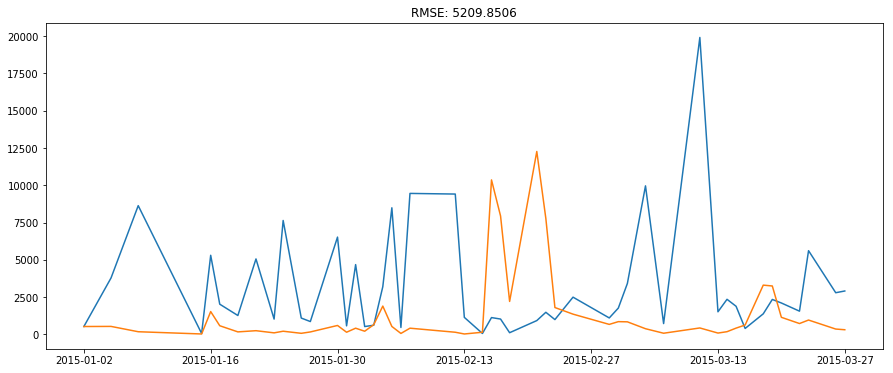

In [86]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df2['sum'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df2['sum'])**2)/len(df2['sum'])))